# **IMITATION:  VOICE CONVERSION USING SIGNAL PROCESSING**

---


AUTHOR:  DORA MARIA BALLESTEROS

---
If you use this code, please cite the following documents:

1.   Ballesteros L, D. M., & Moreno A, J. M. (2012). On the ability of adaptation of speech signals and data hiding. Expert Systems with Applications, 39(16), 12574-12579.
2.   Ballesteros L, D. M., & Moreno A, J. M. (2012). Highly transparent steganography model of speech signals using Efficient Wavelet Masking. Expert Systems with Applications, 39(10), 9141-9149.

In [1]:
# This code allows to obtain some statistics of the audios as well as their histograms.
# The inputs are: audio1, audio2
# The outputs are: avg1, avg2, std1, std2, kurtosis1, kurtosis2, skewness1, skewness2, entropy1, entropy2, histogram1, histogram2
# Author: Dora Maria Ballesteros
# Last version: 28/05/2021

In [2]:
from scipy.io import wavfile
import IPython
import numpy as np
import scipy.stats as stats
from scipy.stats import kurtosis, skew, entropy
import matplotlib.pyplot as plt

In [3]:
# 1. Load and scaling the audios
sr1, audio1 = wavfile.read('/content/audio1.wav')
audio1=audio1/(np.max(abs(audio1)))
IPython.display.Audio(audio1, rate=sr1)

In [4]:
sr2, audio2 = wavfile.read('/content/audio2.wav')
audio2=audio2/(np.max(abs(audio2)))
IPython.display.Audio(audio2, rate=sr2)

In [5]:
# 2. Obtain the statistics
# avg is the average
# std is the standard devitation
# kur is the kurtosis (measure of how pointed the distribution of the data is, relative to a normal distribution)
# sk is the skewness (measure of symmetry)

avg1 = np.mean(audio1)
avg2 = np.mean(audio2)

std1 = np.std(audio1)
std2 = np.std(audio2)

kur1 = kurtosis(audio1, fisher=False)
kur2 = kurtosis(audio2, fisher=False)

sk1 = skew(audio1)
sk2 = skew(audio2)

print('avg1 is:', avg1)
print('avg2 is:', avg2)

print('std1 is:', std1)
print('std2 is:', std2)

print('kurtosis1 is:', kur1)
print('kurtosis2 is:', kur2)

print('skewness1 is:', sk1)
print('skewness2 is:', sk2)

avg1 is: -0.00027905464277219234
avg2 is: 2.408433051488149e-06
std1 is: 0.14442434785837635
std2 is: 0.18372124328939365
kurtosis1 is: 7.582048225892236
kurtosis2 is: 6.817704875590987
skewness1 is: 0.1320703202211987
skewness2 is: 0.13782917655656363


entropy1 is: 5.823767608676299
entropy2 is: 6.24413540513696


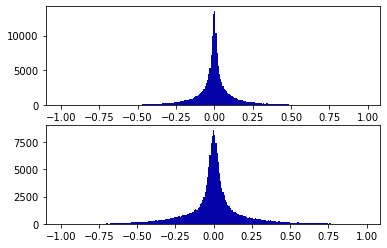

In [6]:
# 3. Obtain their entropy and plot their histograms
# et is the entropy of the audios (measure of uncertainty)

# Histogram and entropy of audio1
fig, axs = plt.subplots(2)
plt.rcParams["figure.figsize"] = (18,16)
n, bins, patches = axs[0].hist(x=audio1, bins=256, color='#0504aa')


p =n/sum(n)
log=np.zeros(len(n))
for i in range(len(n)):
  if n[i]>0:
    log[i]= -np.log2(p[i])*p[i]


et1 = sum(log)
print('entropy1 is:', et1)

# Histogram and entropy of audio2

n, bins, patches = axs[1].hist(x=audio2, bins=256, color='#0504aa')
plt.rcParams["figure.figsize"] = (18,16)

p =n/sum(n)
log=np.zeros(len(n))
for i in range(len(n)):
  if n[i]>0:
    log[i]= -np.log2(p[i])*p[i]


et2 = sum(log)
print('entropy2 is:', et2)